# Introduction to Machine Learning

## The Machine Integration and Learning of Earth Systems (MILES) group (CISL)

<img src="../figures/MILES Members.png">

### What we will (and won't) be covering

* What to expect (Goals by end of course)
    * Understanding of the different machine learning paradigms with applied use cases for unsupervised and supervised datasets
    * The Sklearn API
    * Understanding of cost functions and the thoeory of gradient descent
    * Understanding of the Expectation-Maximzation algorithm
    * How to frame a Supervised machine learning problem in both a regression and classification setting
    * Foundational understanding of preprocessing techniques (scaling, data partioning, sampling)
    * Theorhetical understanding of a few differnt basic ML algorythms
    * Common ML evaluation techniques including uncertainty estimates
    * Applied use of variaous ML problems with a variety of datasets across entire pipeline
        *  data exploration -> Frame problem -> feature selection / transforamtion -> train -> evaluate  

<img src="../figures/ml_wheel.png" width="800">

There's an overwhelming amount of ML material on the web that can sometimes make it difficult to find material in the same voice / style, which is often useful. Here's a nice free resource that gives a very nice overview of statistical learning at an accesible level. 

* [Introduction to Statistical Learning](https://www.statlearning.com/)
 
## So what constitutes "Machine Learning"? What are the advantages and disadvantages?

#### What is the intersection of Machine Learning / AI / Statistics / Data Assimilation?

<img src="../figures/stat_or_ml.png" width="800">

**Poll: Would you consider Linear regression Machine Learning?**

The intersections between all of these are often fuzzy. I'll refrain from defining ML specifically, but the vague concensus around the field seems to be that ML is *prediction focused* and is usually done with a "bottom-up" appraoch, whereas statistical inference is often done with a "top-down" approach and is often more interested in meaningful parameter estimation and variable relationships. Furthermore, statistics is often much more focused on interpretability of a model, where as ML places higher priorty on accuracy. However, there is much growing attention to explainability and interpretability in ML. 

For a look into some of the diffences between machine learning and data assimilation, the [ECMWF newsletter has a nice article](https://www.ecmwf.int/en/newsletter/167/meteorology/data-assimilation-or-machine-learning) describing their relationship.

<img src="../figures/ml_or_da_fig.svg" width="800"/>


#### Advantages of ML 

* Scalability
    * Can potentially emulate very complex processes / physical models for a fraction of computation (during inference)
    * Could potentially characterize uncertainty better by running much larger ensemble simulations
* Can potentially discover meaningful hidden structure in data not previously known
 
#### Disadvantages of ML

* Can require long training times and labeling campaigns as well as intensive data preprocessing
* Can generate unphysical results
* Difficult to interpret 

## The Major Machine Learning Paradigms

<img src="../figures/ml_paradigms.png" width="800">

### Unsupervised Learning

"Supervision" refers to the training process using labeled data to "supervise" the training process by consistently having a label to tune the model parameters and evaluate the model performance during training. Thus, **unsupervised** learning implies that we have no labels to work with. In a sense, we only have "input data". The idea is to learn meaningful relationships aongst the data inherently. This often takes shape in the form of grouping the data into respective clusters. 

### Supervised

Supervised learning has associated targets with each reprective sample. This can be a continuous regression target or any type of classification scheme you can think of. The targets are used to tune the model parameters and evaluate the model performance during training.

#### Semi-supervised

Semi-supervised learning falls between the two, and is partially supervised by limited labels. There are many appraoches to combine the two, however, they are out of the scope of this tutorial. 

#### Reinforcement Learning

Reinforcement learning is likely the most unique of the learning types. This involves training an agent to make decisions given a current state and is evaluated based on a reward function for success. Traing ML algorithms to play board / video games and autonomous vehicles are examples of reinforcement learning.

### Data Challenges

<img src="../figures/mping_sparse.png">


<img src="../figures/mode_labels.png">


<img src="../figures/spatiotemp_corr.png">


<img src="../figures/fe_bias.png">


<img src="../figures/fe_bias_correctd.png">


# The Sklearn (Sci-kit Learn) API

<img src="../figures/scikit-learn-logo.png" width="800">


The [scikit-learn (sklearn) library](https://scikit-learn.org/stable/) is a popular machine learning library in Python that provides a consistent and user-friendly API for a wide range of machine learning tasks. The scikit-learn API is well-structured, well-documented and easy to work with, making it a preferred choice for many machine learning practitioners.

Some nice features built-in to the sklearn framework:
* A wide variety of models, known as *estimators* to choose from
    * Although sklearn does have a neural network implimentation, sklearn is **not** the community preferred framework for training neural networks
* Common data transformation classes for preprocessing tasks such as scaling
* Data partitioning
* A good assortment of evaluation functions
* Different validation techniques
* Built in datasets for easy experimentation
* Easy handling of categorical variables
* Smooth integration with both pandas and numpy

The general workflow of an sklearn object is:

1. initialize the object with it's key word arguments / hyperparameters
    * `my_model = RandomForestClassifier()`
2. Fit / train the model to your data
    * `my_model.fit(my_data)`
3. Make predictions with the model
    * `my_model.predict(my_new_data)` or you can use the `my_model.predict_proba(my_new_data)` to predict probabilities if were a classifier model
  
For other data transformation objects, such as scalers, or label encoders, the API is consistent, but instead of `predict` functions it uses the `.transform()` and `.inverse_transform()` methods. For example:

```
my_scaler = StandardScaler()
my_scaler.fit(data)
transformed_x = my_scaler.transform(data)
original_data = my_scaler.inverse_transform(transformed_x)
```

Traininig data can come in a variety of shapes and sizes, such as images or timeseries, and many custom architectures can handle different shapes of data. However, the **sklearn framework expects a strict 2D matrix** for the input data - the rows reresent an individual sample, and each column represents an indivual **feature**. Although neural networks (such as Convolutional Networks which are common use cases for image data) can handle 3D+ data as input, whereas sklearn models cannot, this does not necessarily mean you can't use n-dimentional data for input - you can flatten whichever dimensions you'd like to conform to the 2D format expected. In the image case, this would just mean flattening each 2D image into a 1D vector, thus making each pixel it's own feature. For example, flattening a set of 32 x 32 images for input into a model would result in a data shape of **(n_images, 1024)**.

# SARS Hail data 

Okay, let's get into some data. For this exercise, we'll use the [Sounding Analog Retrieval System (SARS) dataset](https://www.spc.noaa.gov/publications/jewell/sars.pdf) and take a look at a simplified case to train an estimator.

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

hail = pd.read_parquet('../0_data/SARS_hail.parquet')
hail = hail[hail['MODELb'] > -999] # remove some missing data
hail

,ELEV,SIZE,MUCAPE,MUMR,500TEMP,300T,7-5 LR,5-3 LR,0-3SH,0-6SH,0-9SH,SRH3,SHIP,MODELb
155,824.0,3.00,1954.0,12.400000,-10.4,-35.200001,7.2,6.7,16.799999,29.500000,46.599998,233.0,1.2,2.8
961,79.0,1.00,4004.0,17.200001,-5.9,-31.100000,6.0,6.7,6.200000,4.600000,8.600000,46.0,0.3,0.6
195,872.0,2.75,3989.0,13.700000,-2.5,-33.900002,7.5,8.3,10.500000,14.900000,13.700000,146.0,0.8,2.0
94,357.0,3.75,2640.0,11.900000,-15.1,-42.700001,7.3,7.6,13.400000,24.000000,23.900000,187.0,2.0,2.3
918,1620.0,1.00,713.0,7.100000,-9.9,-37.099998,8.3,7.3,3.100000,14.700000,20.600000,12.0,0.2,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,4.0,1.75,2973.0,16.500000,-6.0,-31.299999,5.7,6.7,4.400000,5.900000,3.100000,33.0,0.2,0.6
856,396.0,1.00,1956.0,12.700000,-6.1,-34.700001,6.4,7.6,16.100000,23.500000,29.400000,149.0,0.5,1.4
580,124.0,1.75,5081.0,18.400000,-10.4,-36.400002,7.5,7.0,10.500000,7.900000,11.200000,157.0,1.0,0.9
287,438.0,2.75,1724.0,10.200000,-16.9,-44.000000,6.4,7.5,24.200001,33.200001,28.200001,289.0,1.3,2.2


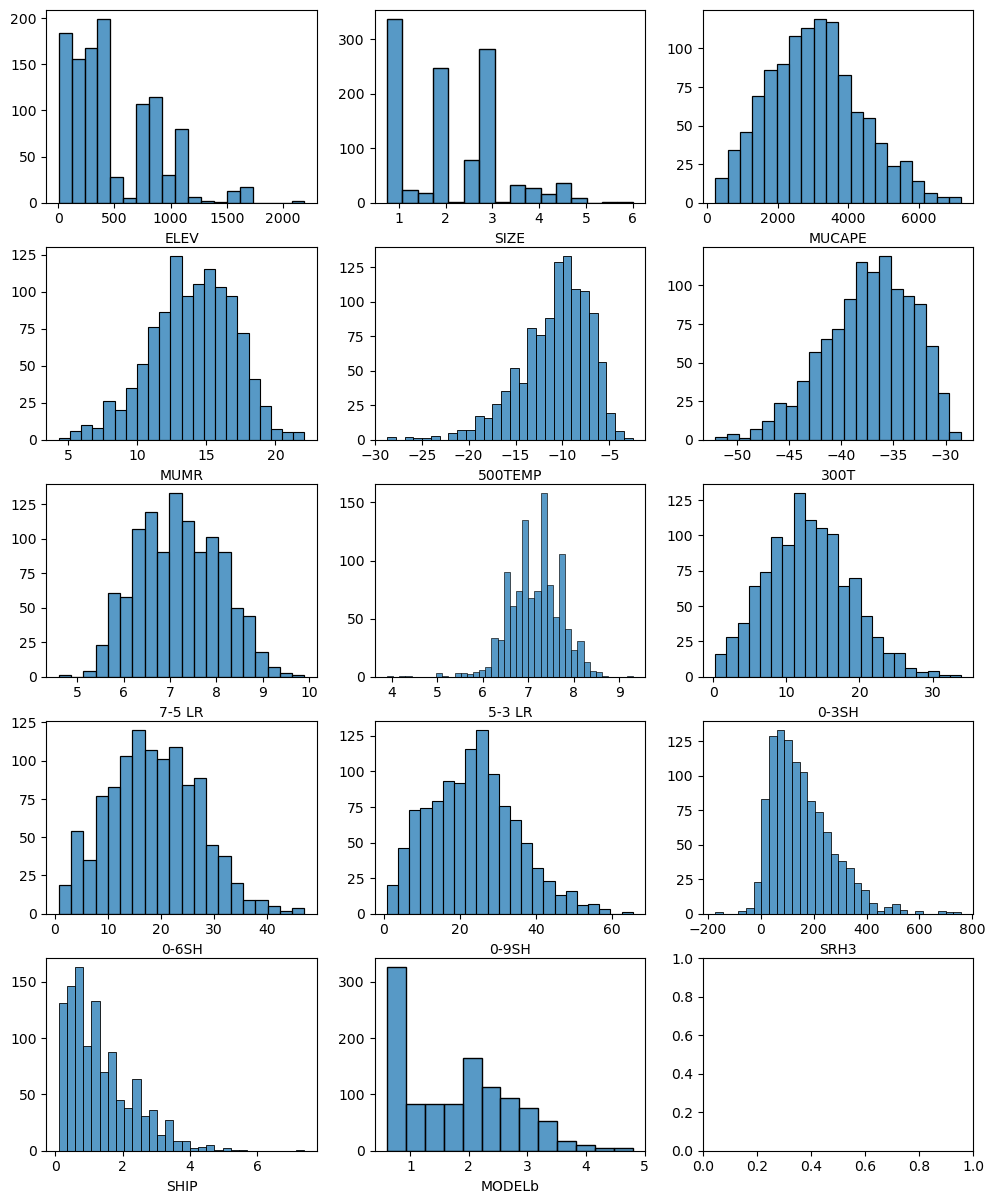

In [7]:
# take a quick look at the feature distributions

fig, axes = plt.subplots(5, 3, figsize=(10, 12))
fig.tight_layout()
for i, ax in enumerate(axes.ravel()):
    if i >=  len(hail.columns):
        break
    sns.histplot(hail.iloc[:, i], ax=ax)
    ax.set_ylabel(None)
    ax.set_xlabel(hail.columns[i])

Now that we can see our features are on very different scales, we might be intersted in transforming them to similar scales. Sklearn has a variety of methods to do this in the [sklearn.preprocessing module](https://scikit-learn.org/stable/modules/preprocessing.html). 

The preprocessors follow a similar structure as the model methods, using a `.fit()` method to fit the data. With data preprocessing transformers, the transorm is first fit and then uses the `.transform()` method to apply the transofmation learned from the data. They also make a convienient `.fit_transform()` method that combines them. To inversely transform variables (often needed if the target variable was scaled) the method `.inverse_transform()` exists.

For models themselves, the same is true for the `.predict()` method. Your would first fit the model and then predict with it using them seperate or comnbined with the `.fit_predict()` mehtod. Let' see an example.

Let's frame this as a regression problem to start, and use the hail `SIZE` feature as our target and keep everything else as our input data.

In [8]:
input_data = hail.drop('SIZE', axis=1)
target = hail['SIZE']

In [9]:
# First we initialize the class (in this case the StandardScaler()

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(input_data)

StandardScaler()

In [10]:
vars(scaler)

{'with_mean': True,
 'with_std': True,
 'copy': True,
 'feature_names_in_': array(['ELEV', 'MUCAPE', 'MUMR', '500TEMP', '300T', '7-5 LR', '5-3 LR',
        '0-3SH', '0-6SH', '0-9SH', 'SRH3', 'SHIP', 'MODELb'], dtype=object),
 'n_features_in_': 13,
 'n_samples_seen_': 1113,
 'mean_': array([ 4.84487871e+02,  3.04674304e+03,  1.39821204e+01, -1.08407907e+01,
        -3.73551662e+01,  7.19514825e+00,  7.16810423e+00,  1.30113208e+01,
         1.86240791e+01,  2.36051213e+01,  1.55541779e+02,  1.34681042e+00,
         1.78149147e+00]),
 'var_': array([1.56303098e+05, 1.71306936e+06, 9.05036311e+00, 1.40032056e+01,
        1.78189694e+01, 7.78682664e-01, 3.26988072e-01, 3.27189196e+01,
        7.19287466e+01, 1.28742446e+02, 1.36162393e+04, 9.79075628e-01,
        9.21993453e-01]),
 'scale_': array([3.95351866e+02, 1.30884276e+03, 3.00838214e+00, 3.74208573e+00,
        4.22125211e+00, 8.82429977e-01, 5.71828709e-01, 5.72004542e+00,
        8.48108169e+00, 1.13464728e+01, 1.16688642e+02, 9.

Okay, we initialized the `StandardScler()` object and fit our data to it, but we have not transformed it yet. We can see all of the attributes of the fit object using the `vars()` keyword. We can now transform our data using the `.transform()` method. These methods can accept pandas dataframes or numpy arrays, but always output a numpy array.

In [11]:
z_normalized_data = scaler.transform(input_data)
print(z_normalized_data)
print(z_normalized_data.shape)

[[ 0.85875934 -0.8348925  -0.5259042  ...  0.66380256 -0.14837088
   1.0607198 ]
 [-1.025638    0.7313766   1.0696383  ... -0.9387527  -1.0579373
  -1.2304577 ]
 [ 0.9801702   0.7199161  -0.09377818 ... -0.08177127 -0.5526226
   0.22756448]
 ...
 [-0.9118153   1.554241    1.4685233  ...  0.01249668 -0.35049677
  -0.91802436]
 [-0.11758606 -1.0106202  -1.2571942  ...  1.1437122  -0.04730803
   0.43585342]
 [ 1.5543424   1.2853011  -0.06053758 ...  0.87804794  3.1867058
   0.53999776]]
(1113, 13)


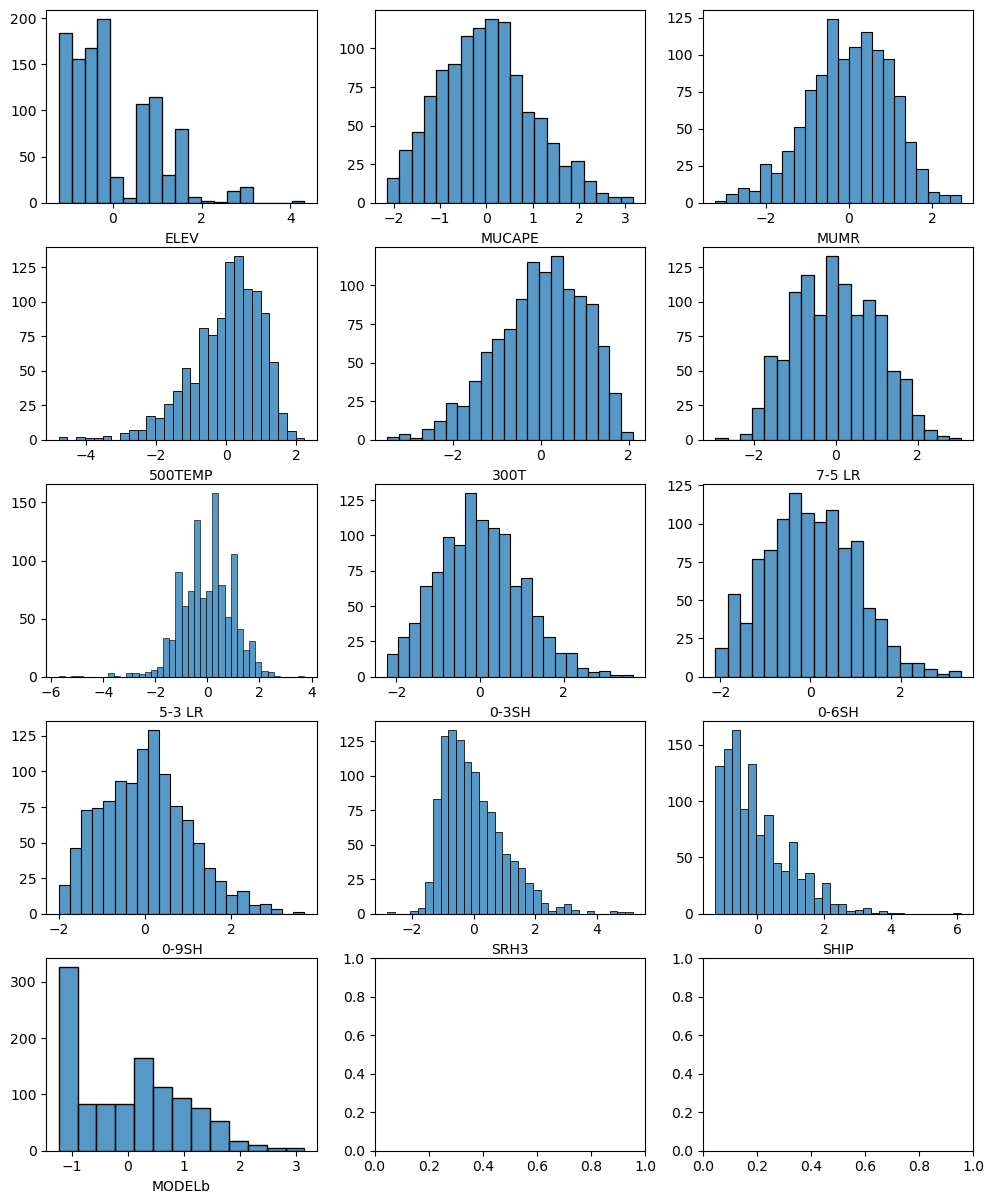

In [12]:
# plot our transformed data

fig, axes = plt.subplots(5, 3, figsize=(10, 12))
fig.tight_layout()
for i, ax in enumerate(axes.ravel()):
    if i >=  input_data.shape[-1]:
        break
    sns.histplot(z_normalized_data[:, i], ax=ax)
    ax.set_ylabel(None)
    ax.set_xlabel(input_data.columns[i])

In [13]:
# demonstate that the inverse transforms back to the original

scaler.inverse_transform(z_normalized_data)

array([[8.24000000e+02, 1.95400000e+03, 1.23999996e+01, ...,
        2.33000000e+02, 1.20000005e+00, 2.79999995e+00],
       [7.89999847e+01, 4.00400000e+03, 1.72000008e+01, ...,
        4.60000000e+01, 3.00000042e-01, 5.99999964e-01],
       [8.72000000e+02, 3.98900000e+03, 1.36999998e+01, ...,
        1.46000000e+02, 8.00000012e-01, 2.00000000e+00],
       ...,
       [1.23999985e+02, 5.08100000e+03, 1.83999996e+01, ...,
        1.57000000e+02, 1.00000000e+00, 8.99999976e-01],
       [4.38000000e+02, 1.72400012e+03, 1.01999998e+01, ...,
        2.89000000e+02, 1.29999995e+00, 2.20000005e+00],
       [1.09900000e+03, 4.72900000e+03, 1.38000002e+01, ...,
        2.58000000e+02, 4.50000000e+00, 2.29999995e+00]], dtype=float32)

In [14]:
z_normalized_data.shape, target.shape

((1113, 13), (1113,))

Now that the data is scaled, let's train a couple of simple models. We can look at the [documentation of our SGD regressor]() and see that the `.fit()` method expects our data in the order (X, y).   

In [15]:
from sklearn.linear_model import SGDRegressor

regressor_model = SGDRegressor() # initialize the model class

In [16]:
# Look at our hyperparameters (since we didn 't specify any upon initialization, it has built in defaults)
vars(regressor_model)

{'loss': 'squared_error',
 'penalty': 'l2',
 'learning_rate': 'invscaling',
 'epsilon': 0.1,
 'alpha': 0.0001,
 'C': 1.0,
 'l1_ratio': 0.15,
 'fit_intercept': True,
 'shuffle': True,
 'random_state': None,
 'verbose': 0,
 'eta0': 0.01,
 'power_t': 0.25,
 'early_stopping': False,
 'validation_fraction': 0.1,
 'n_iter_no_change': 5,
 'warm_start': False,
 'average': False,
 'max_iter': 1000,
 'tol': 0.001}

In [17]:
# fit our model (X, y)
regressor_model.fit(z_normalized_data, target) # fit the model

SGDRegressor()

In [18]:
## inspect out model attributes again
vars(regressor_model)

{'loss': 'squared_error',
 'penalty': 'l2',
 'learning_rate': 'invscaling',
 'epsilon': 0.1,
 'alpha': 0.0001,
 'C': 1.0,
 'l1_ratio': 0.15,
 'fit_intercept': True,
 'shuffle': True,
 'random_state': None,
 'verbose': 0,
 'eta0': 0.01,
 'power_t': 0.25,
 'early_stopping': False,
 'validation_fraction': 0.1,
 'n_iter_no_change': 5,
 'warm_start': False,
 'average': False,
 'max_iter': 1000,
 'tol': 0.001,
 'coef_': array([ 0.05909219,  0.05103485,  0.13389955, -0.00550853,  0.02527366,
        -0.01503963,  0.01456731,  0.11278784,  0.06266016,  0.06919825,
         0.0212271 ,  0.1866131 ,  0.33100718], dtype=float32),
 'intercept_': array([2.07880565]),
 't_': 11131.0,
 'n_features_in_': 13,
 'n_iter_': 10}

Cool, we can easily see the regression coefficients and slope that it's learned along with the hyperparameters we chose (default) all in one place.

In [19]:
# make some predictions on our test set for simplicity
y_hat = regressor_model.predict(z_normalized_data) 

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# look at some metrics
print(mean_squared_error(y_hat, target))
print(mean_absolute_error(y_hat, target))
print(mean_absolute_percentage_error(y_hat, target))

0.6075773941726916
0.6033762825905106
0.3031573370850348


<Axes: ylabel='Count'>

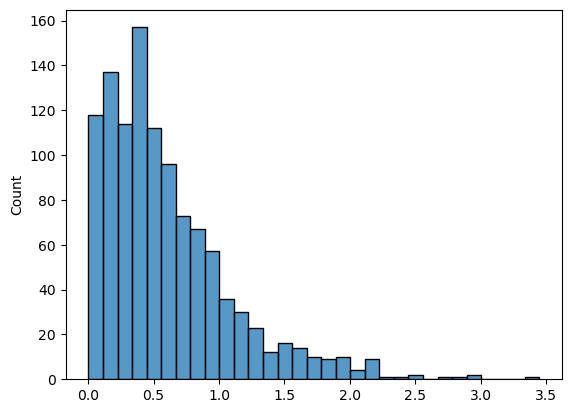

In [21]:
residuals = np.abs(target.values - y_hat)
sns.histplot(residuals)

In [25]:
# with already preprocessed data, we can choose a different model class and train and predict in just a few lines of code
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor()
tree_model.fit(z_normalized_data, target)
tree_model.predict(z_normalized_data)

array([3.  , 1.  , 2.75, ..., 1.75, 2.75, 2.75])

In [26]:
# final review of the ease of sklearn....



Cool, we've trained a couple of basic ML models to predict Hail size in just a few lines of code, but this is more or less a toy example to demonstate the ease of the sklearn API, as we've not tested it on any holdout data, nor have we inspected any hyperparamters or effectivel evaluated it. 

There are many, many more utiilities in sklearn, but the idea here was to just familiarize ourselves with the basic API:
* Iniailize the transformer or model class
* Fit the object to our data as numpy arrays or pandas dataframes
* Use our fit object to predict / transform our data
* All learned parameters and specifed hyperparameters are convieniently stored as objects

But first, let's take a step back and move to some **unsupervised** techniques, and then come back to supervised learning. 